In [1]:
import pandas as pd
import os

In [6]:
data = pd.read_csv(os.path.join("data",os.listdir("data")[0]) , sep = "\t")

In [8]:
data.head(3)

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af


In [82]:
data.iloc[2198 , -8].split("|")

['https://i5.walmartimages.com/asr/825e91d3-fed3-46d0-b2fb-4491951506ec_1.b9d86bc3e28440ce6180a66b17b75a1b.jpeg ',
 ' https://i5.walmartimages.com/asr/0c3f599b-971c-4152-b22c-618e4e4cc2f8_1.27cc696ce13afd5c35b30cec341723c1.jpeg']

In [20]:
features = [
   # "Product Name Source",
   # "Product Brand Source",
   # "Product Brand Normalised Source",
    "Product Company Type Source",
    "Product Tags",
   # "Product Contents"
]

In [21]:
df = data[features].copy()

In [22]:
df.head(3)

,Product Company Type Source,Product Tags
0,Competitor,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,Competitor,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,Competitor,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [23]:
df.isnull().sum()

Product Company Type Source    0
Product Tags                   0
dtype: int64

In [15]:
df.shape

(5000, 6)

In [24]:
df.iloc[1 , 1]

"Nice 'n Easy Permanent Color, 111 Natural Medium Auburn 1 ea (Pack of 3), Wal-mart, Walmart.com"

In [27]:
df["Product Tags"] = df["Product Tags"].str.lower()

In [28]:
df.head(2)

,Product Company Type Source,Product Tags
0,Competitor,"opi infinite shine, nail lacquer nail polish, ..."
1,Competitor,"nice 'n easy permanent color, 111 natural medi..."


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
df["combined_text"] = (
    df["Product Tags"].astype(str).fillna("") + " " +
    df["Product Company Type Source"].astype(str).fillna("")
)

In [36]:
df.head(3)

,Product Company Type Source,Product Tags,combined_text
0,Competitor,"opi infinite shine, nail lacquer nail polish, ...","opi infinite shine, nail lacquer nail polish, ..."
1,Competitor,"nice 'n easy permanent color, 111 natural medi...","nice 'n easy permanent color, 111 natural medi..."
2,Competitor,clairol nice 'n easy permanent color 7/106a na...,clairol nice 'n easy permanent color 7/106a na...


In [37]:
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["combined_text"])


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [44]:
cosine_sim[0]

array([1.        , 0.01659913, 0.01490464, ..., 0.10275904, 0.01574539,
       0.05469509], shape=(5000,))

### Testing


In [46]:
product_index = 1

In [47]:
sim_scores = list(enumerate(cosine_sim[product_index]))

In [53]:
sim_scores[:3]

[(0, np.float64(0.01659912632363093)),
 (1, np.float64(1.0)),
 (2, np.float64(0.4047598996805278))]

In [59]:
sorted_sim = sorted(sim_scores , key = lambda x: x[1] , reverse = True)


In [60]:
top_k = 5
top_k_sim = sorted_sim[:top_k+1]

In [61]:
top_k_sim

[(1, np.float64(1.0)),
 (2158, np.float64(0.705328767300998)),
 (883, np.float64(0.5680676229953523)),
 (4504, np.float64(0.5401339768770878)),
 (3283, np.float64(0.49520664358973693)),
 (646, np.float64(0.45535202244885525))]

In [63]:
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

In [72]:
response = requests.get(data.iloc[product_index , -8])

In [73]:
img = Image.open(BytesIO(response.content))

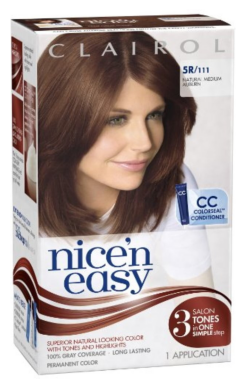

In [74]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [75]:
images = []

In [84]:
for i , j in top_k_sim:
    if i==product_index:
        continue
    else:
        res = requests.get(data.iloc[i , -8].split("|")[0].strip())
        im = Image.open(BytesIO(res.content))
        images.append((i,im))
    

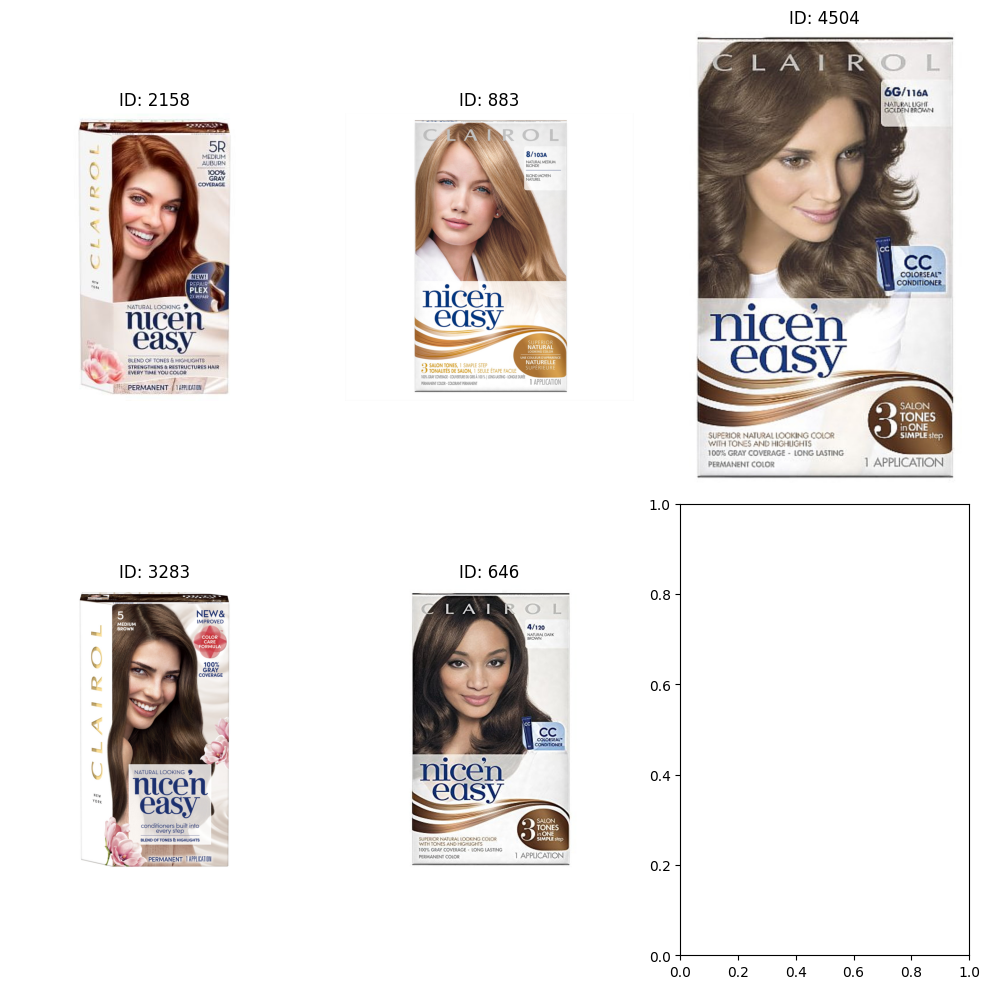

In [87]:
fig , axes = plt.subplots(2 , 3 , figsize = (10,10))
axes = axes.flatten()  # flatten into a 1D list for easy looping
    
for ax, (prod_id, img) in zip(axes, images):
    ax.imshow(img)
    ax.set_title(f"ID: {prod_id}")
    ax.axis('off')


plt.tight_layout()
plt.show()

In [88]:
import numpy as np

np.save("cosine_sim.npy", cosine_sim)


In [89]:
data.to_parquet("products.parquet", index=False)

In [90]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
